# Machine Learning topological phases in real space: second-neighbours SSH model 6561_50 open.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 387 ms, sys: 36.4 ms, total: 424 ms
Wall time: 423 ms


In [6]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/second_neighbours_open_6561_50.csv"
model = RandomForestClassifier(n_estimators=10,criterion="entropy",n_jobs=-1)
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [-1,0,1,2]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.5  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 6.71 s, sys: 335 ms, total: 7.04 s
Wall time: 6.68 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.018648,-0.011856,...,-0.035526,-0.023898,-0.024652,0.054743,0.037192,-0.019603,-0.007444,-0.020456,-0.011856,0.018648
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.001667,0.009061,...,0.043322,-0.059866,-0.041062,0.006819,0.000272,0.032528,0.017980,-0.023590,-0.009061,-0.001667
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.037068,0.023790,...,-0.067409,-0.045178,-0.048010,0.105150,0.073000,-0.037989,-0.014562,-0.040624,-0.023790,0.037068
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.003692,0.017921,...,-0.083711,0.113140,0.079526,-0.012099,0.000192,-0.064157,-0.035888,0.046388,0.017921,0.003692
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.055025,0.035882,...,0.092396,0.061440,0.068817,-0.147201,-0.106074,0.054012,0.021030,0.060215,0.035882,-0.055025


#### Checking initialization

In [7]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  100
n_hamiltonians:  6561
n_ts:  2
CPU times: user 674 µs, sys: 16 µs, total: 690 µs
Wall time: 384 µs


In [8]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8414875781130925
% val:  0.0
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  5521
number of val hamiltonians:  0
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 

## Running a simulation

In [9]:
%%time
#running a simulation
n_experiments = 5
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)


running experiments: 100%|██████████| 5/5 [02:06<00:00, 25.02s/it]

CPU times: user 10min 42s, sys: 18.7 s, total: 11min 1s
Wall time: 2min 6s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.018648,-0.011856,...,-0.035526,-0.023898,-0.024652,0.054743,0.037192,-0.019603,-0.007444,-0.020456,-0.011856,0.018648
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.001667,0.009061,...,0.043322,-0.059866,-0.041062,0.006819,0.000272,0.032528,0.017980,-0.023590,-0.009061,-0.001667
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.037068,0.023790,...,-0.067409,-0.045178,-0.048010,0.105150,0.073000,-0.037989,-0.014562,-0.040624,-0.023790,0.037068
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.003692,0.017921,...,-0.083711,0.113140,0.079526,-0.012099,0.000192,-0.064157,-0.035888,0.046388,0.017921,0.003692
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.055025,0.035882,...,0.092396,0.061440,0.068817,-0.147201,-0.106074,0.054012,0.021030,0.060215,0.035882,-0.055025
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.018648,0.011856,...,-0.035526,0.023898,-0.024652,-0.054743,0.037192,0.019603,-0.007444,0.020456,-0.011856,-0.018648
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,-0.001667,0.009061,...,-0.043322,-0.059866,0.041062,0.006819,-0.000272,0.032528,-0.017980,-0.023590,0.009061,-0.001667
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.055025,0.035882,...,-0.092396,0.061440,-0.068817,-0.147201,0.106074,0.054012,-0.021030,0.060215,-0.035882,-0.055025
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.003692,-0.017921,...,-0.083711,-0.113140,0.079526,0.012099,0.000192,0.064157,-0.035888,-0.046388,0.017921,-0.003692
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.037068,0.023790,...,0.067409,-0.045178,0.048010,0.105150,-0.073000,-0.037989,0.014562,-0.040624,0.023790,0.037068


#### Viewing a random sample

In [10]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 69.2 ms, sys: 45 µs, total: 69.2 ms
Wall time: 68.8 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
467694,4676,H_0.85_0.95_2.01899.dat,0.85,0.95,2.018991,2,-1,test,0.080357,-0.191988,...,0.011598,-0.172066,0.012898,-0.003480,-0.096609,0.185414,-0.050209,-0.046004,0.191988,-0.080357
377737,3777,H_0.3_0.55_0.00173535.dat,0.30,0.55,0.001735,0,0,train,-0.153250,0.111510,...,0.101958,-0.009969,0.128523,-0.132077,-0.005962,-0.093313,-0.119645,0.057769,-0.111510,0.153250
196052,1960,H_-0.8_-1.2_1.51139.dat,-0.80,-1.20,1.511389,999,2,test,0.164637,0.149191,...,-0.136118,0.022322,-0.006855,-0.153728,-0.090976,0.029779,0.019145,-0.108544,0.149191,0.164637
650041,6500,H_2_-1_0.000361541.dat,2.00,-1.00,0.000362,999,1,test,0.141883,0.165171,...,-0.099884,-0.088773,0.049394,0.116420,0.116471,0.049503,-0.071304,-0.134496,-0.165171,-0.141883
101166,1011,H_-1.4_-0.05_-0.00200852.dat,-1.40,-0.05,-0.002009,0,0,val,0.104618,-0.054665,...,-0.042216,0.023976,-0.057060,-0.027671,-0.110508,0.184263,0.164538,0.009147,0.054665,-0.104618
562090,5620,H_1.45_-0.45_0.000256876.dat,1.45,-0.45,0.000257,999,1,test,-0.003428,0.006958,...,0.058143,-0.051405,0.043023,-0.036723,0.028982,-0.023195,0.016366,-0.012028,0.006958,-0.003428
411410,4114,H_0.5_1.2_2.00294.dat,0.50,1.20,2.002944,2,2,val,0.060446,-0.030459,...,0.138196,-0.139639,0.124798,-0.136642,0.100817,-0.120139,0.060810,-0.093015,0.030459,-0.060446
231070,2310,H_-0.6_0.1_-0.0021692.dat,-0.60,0.10,-0.002169,0,0,train,0.049057,-0.025101,...,0.147835,0.177414,0.066909,0.102826,0.117653,0.093265,0.089838,0.147001,-0.025101,0.049057
280887,2808,H_-0.3_0.7_0.000108463.dat,-0.30,0.70,0.000108,0,0,val,0.085248,-0.189671,...,-0.130674,0.138204,0.093446,-0.006705,0.039473,-0.127160,-0.157783,0.157262,0.189671,-0.085248
536135,5361,H_1.3_-1.25_1.00094.dat,1.30,-1.25,1.000936,1,1,val,-0.199933,-0.112413,...,0.110372,0.012249,0.075748,0.159452,-0.119860,-0.101858,0.026791,-0.028788,0.112413,0.199933


#### Checking train/val/test splits again

In [11]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [4392, 607, 2223, 5313, 6508, 4237, 6077, 5013, 1840, 6182, 5370, 2535, 2392, 4981, 2065, 2758, 4618, 3474, 2241, 2976, 4532, 5895, 236, 4054, 3178, 1020, 2824, 2365, 5273, 2016, 3329, 2771, 209, 3566, 1276, 4307, 297, 116, 4305, 5710, 1865, 2752, 890, 2056, 3502, 6246, 4071, 5703, 482, 1169, 4750, 1463, 1272, 3053, 4128, 4486, 3637, 123, 3682, 2847, 668, 1609, 4369, 4404, 2222, 152, 3418, 1505, 3881, 2994, 6438, 4944, 715, 5510, 3222, 5814, 3744, 3538, 4516, 1016, 2717, 4363, 5348, 5158, 3740, 2418, 6181, 1575, 5064, 3066, 16, 3336, 2357, 4644, 6485, 3844, 4442, 5063, 4991, 785, 5876, 4149, 2506, 1402, 3716, 4762, 3979, 6331, 6546, 57, 5443, 609, 6194, 2147, 3861, 6203, 4293, 1590, 1851, 6488, 4889, 2388, 2067, 3611, 46

#### Checking summaries

In [12]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 263 µs, sys: 7 µs, total: 270 µs
Wall time: 181 µs


,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.45,0.24,0.22,0.09,999,-1
1,-2.0,-1.95,test,0.34,0.30,0.23,0.13,-1,-1
2,-2.0,-1.90,test,0.30,0.32,0.24,0.14,-1,0
3,-2.0,-1.85,test,0.38,0.29,0.20,0.13,-1,-1
4,-2.0,-1.80,test,0.40,0.24,0.23,0.13,-1,-1
5,-2.0,-1.75,test,0.49,0.21,0.20,0.10,-1,-1
6,-2.0,-1.70,test,0.54,0.26,0.15,0.05,-1,-1
7,-2.0,-1.65,test,0.58,0.23,0.13,0.06,-1,-1
8,-2.0,-1.60,test,0.64,0.20,0.12,0.04,-1,-1


In [13]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  656100


,id,phase,pred_phase,type_of
0,0,999,2,test
1,0,999,-1,test
2,0,999,-1,test
3,0,999,-1,test
4,0,999,0,test
5,0,999,2,test
6,0,999,2,test
7,0,999,1,test
8,0,999,-1,test
9,0,999,-1,test


#### Checking accuracies

In [14]:
simulation.accuracy

{'eigenvector_train': 0.9991669684896777,
 'eigenvector_val': 0.9632427536231885,
 'eigenvector_test': 0.660500582072177,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9934782608695653,
 'hamiltonian_test': 0.8428405122235157}

#### Checking data stored in  memory

In [15]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [16]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [17]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

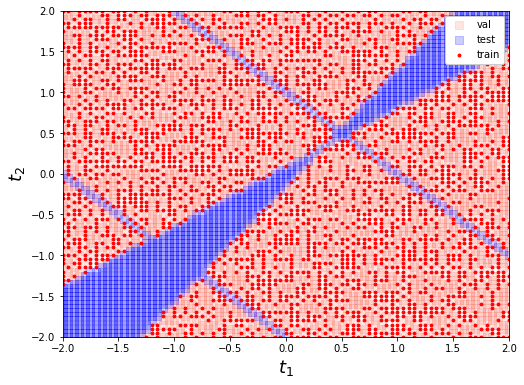

In [18]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [20]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [21]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [22]:
experiment.print_train_val_test()

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


#### Viewing dataset summary

In [23]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
 0    0.325122
 1    0.322586
-1    0.178953
 2    0.173338
Name: phase, dtype: float64


total train/val phases: 
 0    1795
 1    1781
-1     988
 2     957
Name: phase, dtype: int64


Summary of test data

% test phases: 
 2    0.399302
-1    0.363213
 1    0.126892
 0    0.110594
Name: phase, dtype: float64


total test phases: 
 2    343
-1    312
 1    109
 0     95
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
 1    0.296238
 0    0.296238
-1    0.203762
 2    0.203762
Name: phase, dtype: float64


total phases: 
 1    1890
 0    1890
-1    1300
 2    1300
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [24]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,-1,test
1,0,999,2,test
2,0,999,-1,test
3,0,999,-1,test
4,0,999,0,test


#### Vieweng Hamiltonian summary

In [25]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.38,0.35,0.18,0.09,999,-1
1,-2.0,-1.95,test,0.39,0.30,0.22,0.09,-1,-1
2,-2.0,-1.90,test,0.40,0.27,0.23,0.10,-1,-1
3,-2.0,-1.85,test,0.50,0.29,0.14,0.07,-1,-1
4,-2.0,-1.80,test,0.55,0.26,0.15,0.04,-1,-1


#### Viewing accuracy

In [26]:
experiment.accuracy

{'eigenvector_train': 0.9992068091271279,
 'eigenvector_val': 0.9616956521739131,
 'eigenvector_test': 0.6524214202561117,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9960144927536232,
 'hamiltonian_test': 0.8451688009313155}

#### Visualizing train/val/test splits with scatter plot

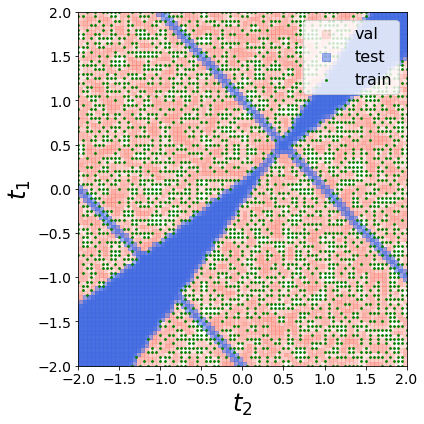

In [27]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

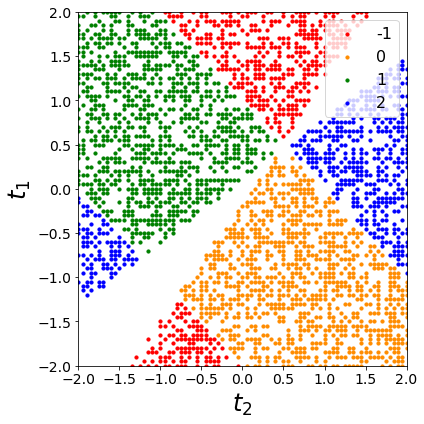

In [29]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

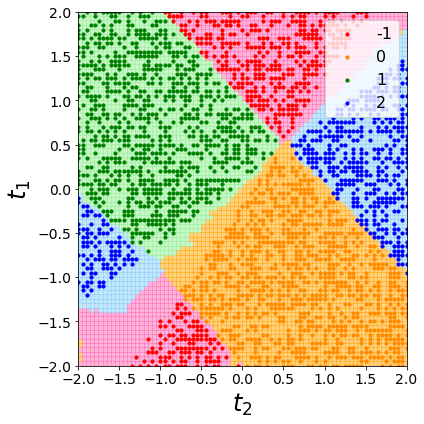

In [30]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

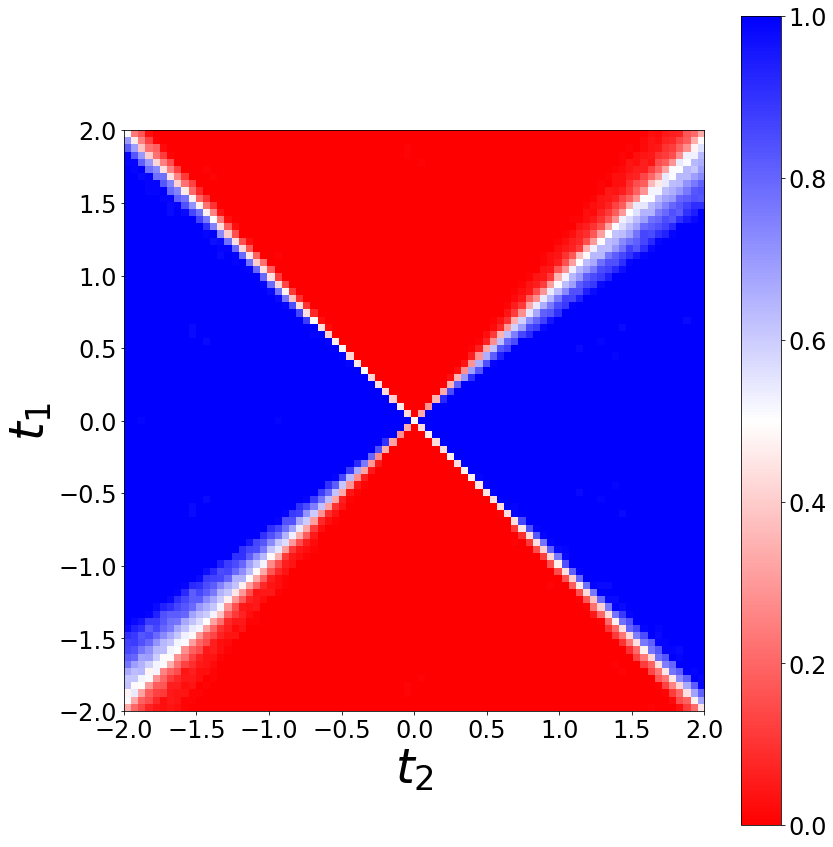

In [25]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [26]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [27]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 137050.74it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


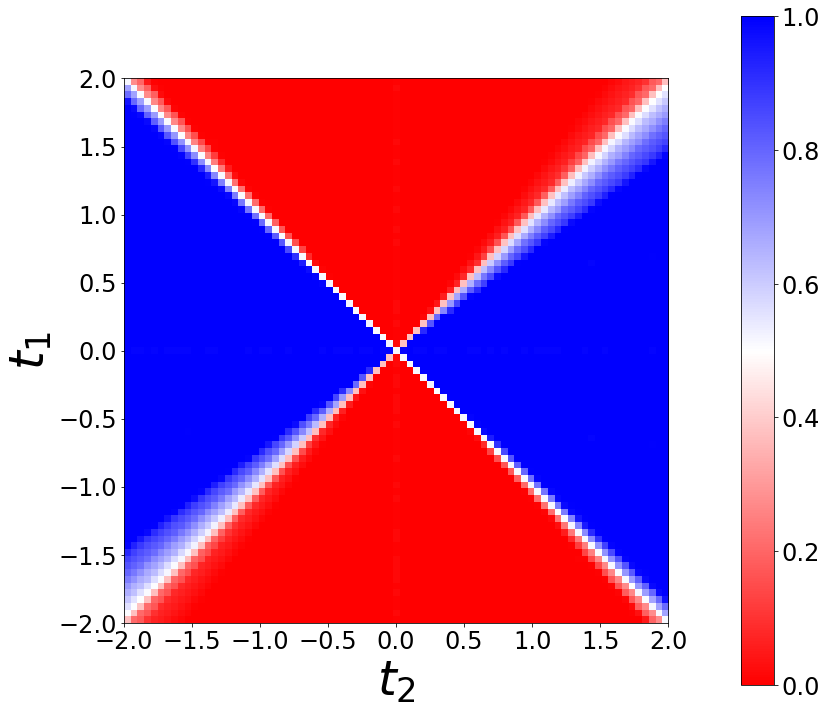

In [28]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [29]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.93it/s]


{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9989770999999998,
 'eigenvector_test': 0.7663012935323381,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9316815920398008}

#### Computing bootstrap accuracies

In [30]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9194029850746268}

#### Computing mean feature importances

In [31]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 2126.53it/s]

Sorted feature importances:  [(1, 0.15521045516657), (98, 0.13434330258621668), (67, 0.07188523726453905), (48, 0.0604173455893953), (0, 0.04986781239248363), (49, 0.04720637598606173), (32, 0.04619827826160608), (99, 0.03952102866877076), (50, 0.033398004235205406), (3, 0.027385803537795184), (96, 0.027156767967142545), (51, 0.02368966353223593), (5, 0.02179630645184238), (94, 0.017875847296619493), (9, 0.010424874071609419), (90, 0.008980251485379948), (69, 0.007001534568683433), (7, 0.006929598205310846), (66, 0.006760546771116551), (55, 0.004959953427747254), (33, 0.004919168802575394), (53, 0.004869461060181067), (75, 0.00471014197466853), (91, 0.004154236917938715), (46, 0.0040648409398122455), (22, 0.004052641730172149), (30, 0.0038800991934482085), (87, 0.0038736974726287536), (93, 0.0037899783994184257), (65, 0.003776506229014719), (97, 0.003664422269559818), (92, 0.0036034263133842533), (70, 0.003480356521158518), (11, 0.0033934408088584465), (35, 0.003366858540732225), (26, 

#### Plotting feature importances

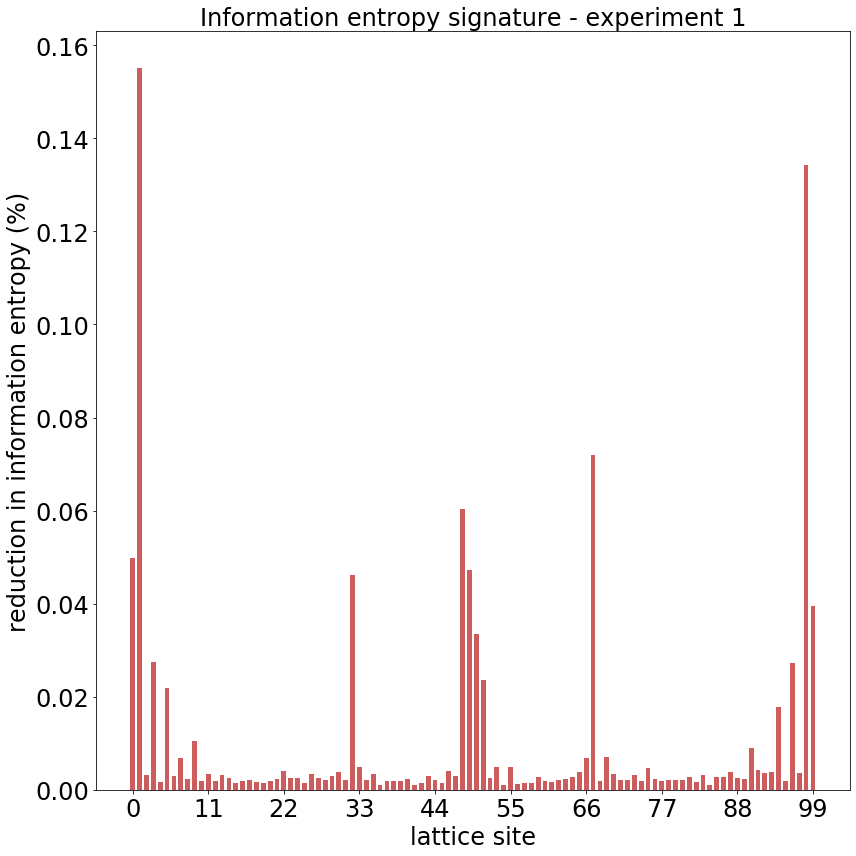

In [32]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

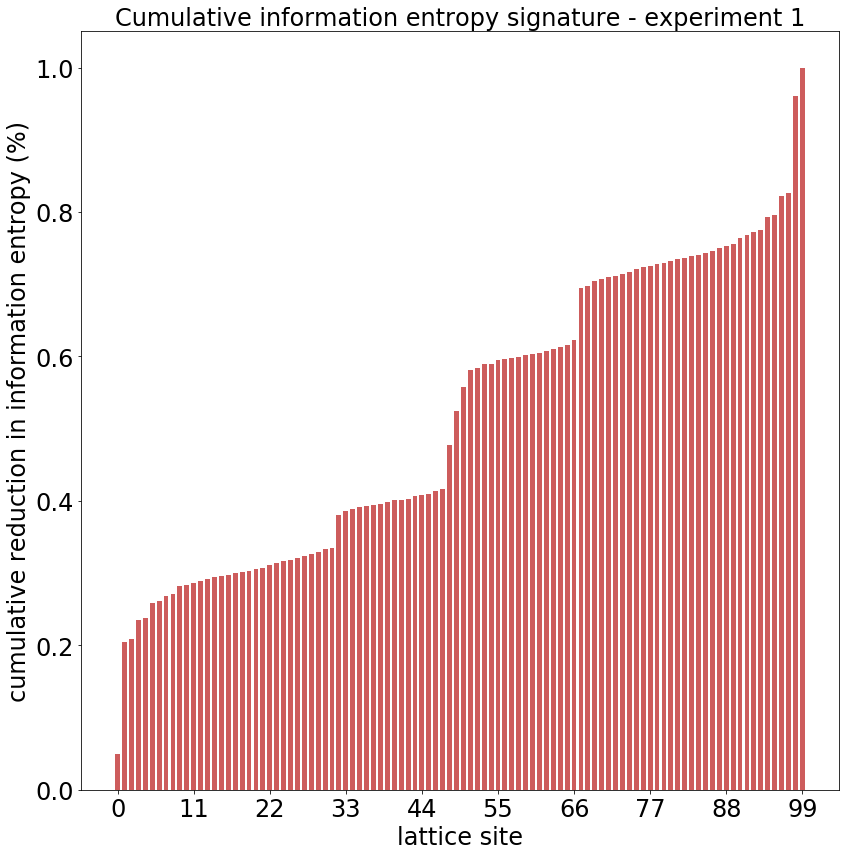

In [33]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features: 1,98

We now rerun the simulations using the most relevant features only

In [34]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 786 µs, sys: 18 µs, total: 804 µs
Wall time: 636 µs


In [35]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_50.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50_feat_1_98"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [1,98]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 7.22 s, sys: 464 ms, total: 7.69 s
Wall time: 7.27 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.008748,0.004376,...,-0.038881,0.043068,-0.030398,0.034656,-0.021797,0.026110,-0.013112,0.017463,-0.004376,0.008748
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.017463,0.008748,...,0.074735,-0.082003,0.059360,-0.067178,0.043068,-0.051314,0.026110,-0.034656,0.008748,-0.017463
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.026110,-0.013112,...,0.104770,-0.113068,0.085520,-0.095561,0.063300,-0.074735,0.038881,-0.051314,0.013112,-0.026110
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.034656,0.017463,...,0.126648,-0.133281,0.107641,-0.118057,0.082003,-0.095561,0.051314,-0.067178,0.017463,-0.034656
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.043068,0.021797,...,-0.138665,0.140702,-0.124679,0.133281,-0.098727,0.113068,-0.063300,0.082003,-0.021797,0.043068


### Running simulation

In [36]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [04:28<00:00,  2.67s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.008748,0.004376,...,-0.038881,0.043068,-0.030398,0.034656,-0.021797,0.026110,-0.013112,0.017463,-0.004376,0.008748
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.017463,0.008748,...,0.074735,-0.082003,0.059360,-0.067178,0.043068,-0.051314,0.026110,-0.034656,0.008748,-0.017463
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.026110,-0.013112,...,0.104770,-0.113068,0.085520,-0.095561,0.063300,-0.074735,0.038881,-0.051314,0.013112,-0.026110
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.034656,0.017463,...,0.126648,-0.133281,0.107641,-0.118057,0.082003,-0.095561,0.051314,-0.067178,0.017463,-0.034656
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.043068,0.021797,...,-0.138665,0.140702,-0.124679,0.133281,-0.098727,0.113068,-0.063300,0.082003,-0.021797,0.043068
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.008748,0.004376,...,0.038881,0.043068,0.030398,0.034656,0.021797,0.026110,0.013112,0.017463,0.004376,0.008748
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.017463,0.008748,...,-0.074735,-0.082003,-0.059360,-0.067178,-0.043068,-0.051314,-0.026110,-0.034656,-0.008748,-0.017463
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.026110,0.013112,...,0.104770,0.113068,0.085520,0.095561,0.063300,0.074735,0.038881,0.051314,0.013112,0.026110
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.034656,0.017463,...,-0.126648,-0.133281,-0.107641,-0.118057,-0.082003,-0.095561,-0.051314,-0.067178,-0.017463,-0.034656
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.043068,0.021797,...,0.138665,0.140702,0.124679,0.133281,0.098727,0.113068,0.063300,0.082003,0.021797,0.043068


#### Loading simulation

In [37]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50_feat_1_98"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [38]:
simulation.n_experiments

100

In [39]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 128048.15it/s]


#### Computing mean accuracies with less features

In [40]:
simulation.n_experiments

100

In [41]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.53it/s]


{'eigenvector_train': 0.9792388489208633,
 'eigenvector_val': 0.7784280000000001,
 'eigenvector_test': 0.6116021890547264,
 'hamiltonian_train': 0.9877697841726618,
 'hamiltonian_val': 0.937848,
 'hamiltonian_test': 0.6943283582089552}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


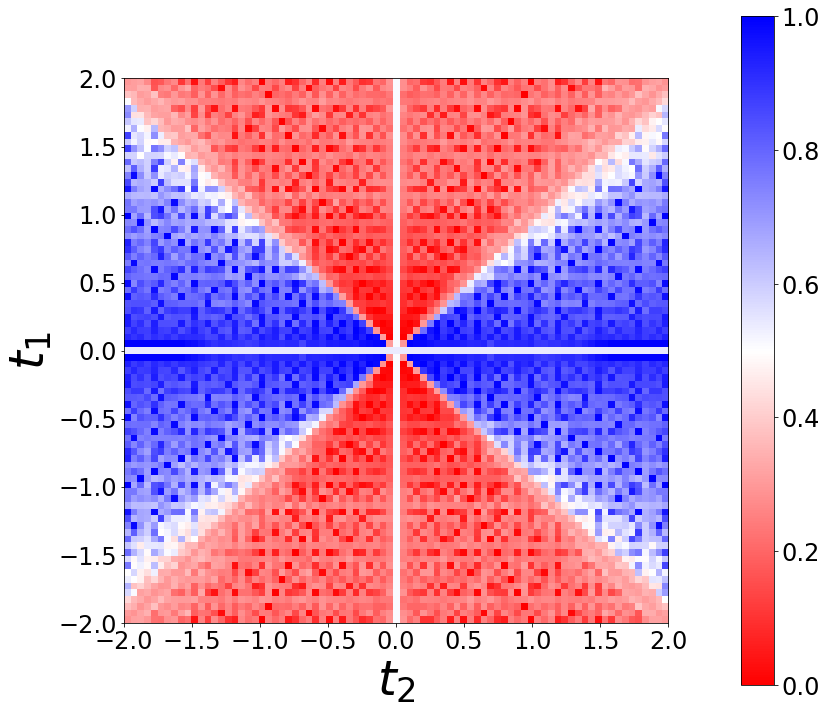

In [42]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_feat_1_98_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features: 1,67

In [43]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 624 µs, sys: 17 µs, total: 641 µs
Wall time: 448 µs


In [44]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_50.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50_feat_1_67"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [1,67]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 7.3 s, sys: 412 ms, total: 7.72 s
Wall time: 7.3 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.008748,0.004376,...,-0.038881,0.043068,-0.030398,0.034656,-0.021797,0.026110,-0.013112,0.017463,-0.004376,0.008748
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.017463,0.008748,...,0.074735,-0.082003,0.059360,-0.067178,0.043068,-0.051314,0.026110,-0.034656,0.008748,-0.017463
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.026110,-0.013112,...,0.104770,-0.113068,0.085520,-0.095561,0.063300,-0.074735,0.038881,-0.051314,0.013112,-0.026110
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.034656,0.017463,...,0.126648,-0.133281,0.107641,-0.118057,0.082003,-0.095561,0.051314,-0.067178,0.017463,-0.034656
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.043068,0.021797,...,-0.138665,0.140702,-0.124679,0.133281,-0.098727,0.113068,-0.063300,0.082003,-0.021797,0.043068


### Running simulation

In [45]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [03:57<00:00,  2.39s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.008748,0.004376,...,-0.038881,0.043068,-0.030398,0.034656,-0.021797,0.026110,-0.013112,0.017463,-0.004376,0.008748
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.017463,0.008748,...,0.074735,-0.082003,0.059360,-0.067178,0.043068,-0.051314,0.026110,-0.034656,0.008748,-0.017463
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.026110,-0.013112,...,0.104770,-0.113068,0.085520,-0.095561,0.063300,-0.074735,0.038881,-0.051314,0.013112,-0.026110
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.034656,0.017463,...,0.126648,-0.133281,0.107641,-0.118057,0.082003,-0.095561,0.051314,-0.067178,0.017463,-0.034656
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.043068,0.021797,...,-0.138665,0.140702,-0.124679,0.133281,-0.098727,0.113068,-0.063300,0.082003,-0.021797,0.043068
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.008748,0.004376,...,0.038881,0.043068,0.030398,0.034656,0.021797,0.026110,0.013112,0.017463,0.004376,0.008748
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.017463,0.008748,...,-0.074735,-0.082003,-0.059360,-0.067178,-0.043068,-0.051314,-0.026110,-0.034656,-0.008748,-0.017463
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.026110,0.013112,...,0.104770,0.113068,0.085520,0.095561,0.063300,0.074735,0.038881,0.051314,0.013112,0.026110
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.034656,0.017463,...,-0.126648,-0.133281,-0.107641,-0.118057,-0.082003,-0.095561,-0.051314,-0.067178,-0.017463,-0.034656
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.043068,0.021797,...,0.138665,0.140702,0.124679,0.133281,0.098727,0.113068,0.063300,0.082003,0.021797,0.043068


#### Loading simulation

In [46]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50_feat_1_67"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [47]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 118926.80it/s]


#### Computing mean accuracies with features 1,67

In [48]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.90it/s]


{'eigenvector_train': 0.9879730215827338,
 'eigenvector_val': 0.9815118199999999,
 'eigenvector_test': 0.7035442786069652,
 'hamiltonian_train': 0.9884892086330936,
 'hamiltonian_val': 0.9852800000000002,
 'hamiltonian_test': 0.8702885572139302}

#### Plotting heatmap for features 1,67

Skipping winding 0
Plotting winding 1


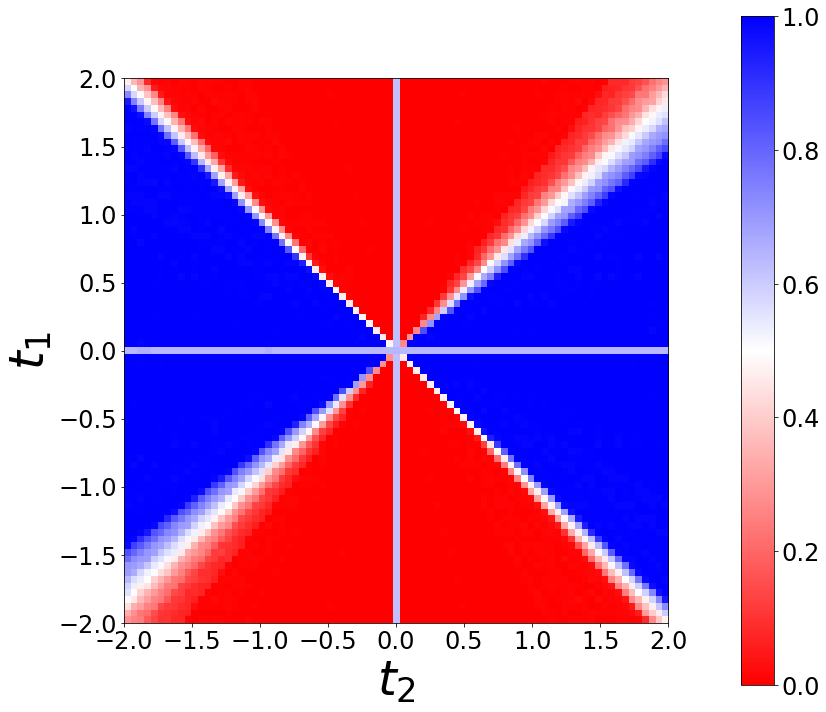

In [49]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_feat_1_67_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features (2 random features)

In [50]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_50.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50_random_feat_2"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB
CPU times: user 7.19 s, sys: 404 ms, total: 7.6 s
Wall time: 7.17 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.008748,0.004376,...,-0.038881,0.043068,-0.030398,0.034656,-0.021797,0.026110,-0.013112,0.017463,-0.004376,0.008748
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.017463,0.008748,...,0.074735,-0.082003,0.059360,-0.067178,0.043068,-0.051314,0.026110,-0.034656,0.008748,-0.017463
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,0.026110,-0.013112,...,0.104770,-0.113068,0.085520,-0.095561,0.063300,-0.074735,0.038881,-0.051314,0.013112,-0.026110
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.034656,0.017463,...,0.126648,-0.133281,0.107641,-0.118057,0.082003,-0.095561,0.051314,-0.067178,0.017463,-0.034656
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,666,test,-0.043068,0.021797,...,-0.138665,0.140702,-0.124679,0.133281,-0.098727,0.113068,-0.063300,0.082003,-0.021797,0.043068


#### Running simulation

In [51]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [94 38]


running experiments:   1%|          | 1/100 [00:02<04:19,  2.63s/it]

random_features:  [91 98]


running experiments:   2%|▏         | 2/100 [00:05<04:15,  2.60s/it]

random_features:  [61 55]


running experiments:   3%|▎         | 3/100 [00:07<04:07,  2.55s/it]

random_features:  [18 61]


running experiments:   4%|▍         | 4/100 [00:10<04:02,  2.53s/it]

random_features:  [42 13]


running experiments:   5%|▌         | 5/100 [00:12<04:02,  2.56s/it]

random_features:  [ 3 58]


running experiments:   6%|▌         | 6/100 [00:15<03:59,  2.55s/it]

random_features:  [76 13]


running experiments:   7%|▋         | 7/100 [00:17<03:58,  2.56s/it]

random_features:  [52 53]


running experiments:   8%|▊         | 8/100 [00:20<03:53,  2.54s/it]

random_features:  [98 82]


running experiments:   9%|▉         | 9/100 [00:22<03:48,  2.51s/it]

random_features:  [77 47]


running experiments:  10%|█         | 10/100 [00:25<03:44,  2.49s/it]

random_features:  [31  6]


running experiments:  11%|█         | 11/100 [00:27<03:44,  2.52s/it]

random_features:  [91 69]


running experiments:  12%|█▏        | 12/100 [00:30<03:40,  2.51s/it]

random_features:  [11 39]


running experiments:  13%|█▎        | 13/100 [00:32<03:37,  2.50s/it]

random_features:  [86 71]


running experiments:  14%|█▍        | 14/100 [00:35<03:35,  2.50s/it]

random_features:  [24 15]


running experiments:  15%|█▌        | 15/100 [00:37<03:32,  2.50s/it]

random_features:  [50 60]


running experiments:  16%|█▌        | 16/100 [00:40<03:30,  2.50s/it]

random_features:  [58 35]


running experiments:  17%|█▋        | 17/100 [00:42<03:29,  2.52s/it]

random_features:  [ 2 27]


running experiments:  18%|█▊        | 18/100 [00:45<03:26,  2.52s/it]

random_features:  [18 52]


running experiments:  19%|█▉        | 19/100 [00:47<03:22,  2.50s/it]

random_features:  [67  9]


running experiments:  20%|██        | 20/100 [00:50<03:18,  2.48s/it]

random_features:  [95 30]


running experiments:  21%|██        | 21/100 [00:52<03:17,  2.50s/it]

random_features:  [33 16]


running experiments:  22%|██▏       | 22/100 [00:55<03:17,  2.53s/it]

random_features:  [66 13]


running experiments:  23%|██▎       | 23/100 [00:58<03:17,  2.56s/it]

random_features:  [ 9 84]


running experiments:  24%|██▍       | 24/100 [01:00<03:18,  2.61s/it]

random_features:  [57 64]


running experiments:  25%|██▌       | 25/100 [01:03<03:18,  2.65s/it]

random_features:  [41 46]


running experiments:  26%|██▌       | 26/100 [01:06<03:16,  2.66s/it]

random_features:  [17 61]


running experiments:  27%|██▋       | 27/100 [01:08<03:10,  2.60s/it]

random_features:  [ 4 91]


running experiments:  28%|██▊       | 28/100 [01:11<03:04,  2.57s/it]

random_features:  [19  2]


running experiments:  29%|██▉       | 29/100 [01:13<03:01,  2.55s/it]

random_features:  [25 26]


running experiments:  30%|███       | 30/100 [01:16<03:01,  2.59s/it]

random_features:  [ 9 41]


running experiments:  31%|███       | 31/100 [01:18<02:57,  2.58s/it]

random_features:  [60  7]


running experiments:  32%|███▏      | 32/100 [01:21<02:59,  2.64s/it]

random_features:  [27 59]


running experiments:  33%|███▎      | 33/100 [01:24<02:55,  2.62s/it]

random_features:  [92  6]


running experiments:  34%|███▍      | 34/100 [01:26<02:54,  2.64s/it]

random_features:  [76 30]


running experiments:  35%|███▌      | 35/100 [01:29<02:51,  2.64s/it]

random_features:  [70 69]


running experiments:  36%|███▌      | 36/100 [01:32<02:49,  2.65s/it]

random_features:  [86 59]


running experiments:  37%|███▋      | 37/100 [01:35<02:49,  2.69s/it]

random_features:  [26 82]


running experiments:  38%|███▊      | 38/100 [01:37<02:43,  2.64s/it]

random_features:  [11 87]


running experiments:  39%|███▉      | 39/100 [01:40<02:40,  2.64s/it]

random_features:  [ 1 24]


running experiments:  40%|████      | 40/100 [01:42<02:34,  2.58s/it]

random_features:  [36 16]


running experiments:  41%|████      | 41/100 [01:45<02:30,  2.55s/it]

random_features:  [14 84]


running experiments:  42%|████▏     | 42/100 [01:47<02:26,  2.52s/it]

random_features:  [15 56]


running experiments:  43%|████▎     | 43/100 [01:50<02:23,  2.52s/it]

random_features:  [62 19]


running experiments:  44%|████▍     | 44/100 [01:52<02:20,  2.51s/it]

random_features:  [ 6 25]


running experiments:  45%|████▌     | 45/100 [01:54<02:16,  2.49s/it]

random_features:  [63 94]


running experiments:  46%|████▌     | 46/100 [01:57<02:14,  2.50s/it]

random_features:  [20 70]


running experiments:  47%|████▋     | 47/100 [02:00<02:12,  2.50s/it]

random_features:  [ 5 58]


running experiments:  48%|████▊     | 48/100 [02:02<02:10,  2.52s/it]

random_features:  [69 94]


running experiments:  49%|████▉     | 49/100 [02:05<02:09,  2.53s/it]

random_features:  [88  9]


running experiments:  50%|█████     | 50/100 [02:07<02:07,  2.54s/it]

random_features:  [66 24]


running experiments:  51%|█████     | 51/100 [02:10<02:06,  2.59s/it]

random_features:  [84 81]


running experiments:  52%|█████▏    | 52/100 [02:13<02:05,  2.61s/it]

random_features:  [77 82]


running experiments:  53%|█████▎    | 53/100 [02:15<02:01,  2.59s/it]

random_features:  [79 57]


running experiments:  54%|█████▍    | 54/100 [02:18<01:58,  2.58s/it]

random_features:  [59 85]


running experiments:  55%|█████▌    | 55/100 [02:20<01:54,  2.55s/it]

random_features:  [97 96]


running experiments:  56%|█████▌    | 56/100 [02:23<01:51,  2.53s/it]

random_features:  [91 70]


running experiments:  57%|█████▋    | 57/100 [02:25<01:50,  2.56s/it]

random_features:  [74 56]


running experiments:  58%|█████▊    | 58/100 [02:28<01:49,  2.60s/it]

random_features:  [76 47]


running experiments:  59%|█████▉    | 59/100 [02:31<01:46,  2.61s/it]

random_features:  [55 86]


running experiments:  60%|██████    | 60/100 [02:33<01:45,  2.64s/it]

random_features:  [98 91]


running experiments:  61%|██████    | 61/100 [02:36<01:43,  2.65s/it]

random_features:  [ 0 79]


running experiments:  62%|██████▏   | 62/100 [02:39<01:42,  2.69s/it]

random_features:  [89 84]


running experiments:  63%|██████▎   | 63/100 [02:41<01:39,  2.70s/it]

random_features:  [66 59]


running experiments:  64%|██████▍   | 64/100 [02:44<01:35,  2.65s/it]

random_features:  [79  2]


running experiments:  65%|██████▌   | 65/100 [02:47<01:32,  2.63s/it]

random_features:  [ 1 16]


running experiments:  66%|██████▌   | 66/100 [02:49<01:29,  2.63s/it]

random_features:  [87 99]


running experiments:  67%|██████▋   | 67/100 [02:52<01:25,  2.60s/it]

random_features:  [49 52]


running experiments:  68%|██████▊   | 68/100 [02:54<01:23,  2.61s/it]

random_features:  [11 73]


running experiments:  69%|██████▉   | 69/100 [02:57<01:20,  2.61s/it]

random_features:  [88 82]


running experiments:  70%|███████   | 70/100 [03:00<01:17,  2.58s/it]

random_features:  [53  3]


running experiments:  71%|███████   | 71/100 [03:02<01:14,  2.56s/it]

random_features:  [63 30]


running experiments:  72%|███████▏  | 72/100 [03:05<01:12,  2.58s/it]

random_features:  [73 25]


running experiments:  73%|███████▎  | 73/100 [03:07<01:10,  2.62s/it]

random_features:  [44 74]


running experiments:  74%|███████▍  | 74/100 [03:10<01:08,  2.63s/it]

random_features:  [94  3]


running experiments:  75%|███████▌  | 75/100 [03:13<01:05,  2.62s/it]

random_features:  [86 24]


running experiments:  76%|███████▌  | 76/100 [03:15<01:03,  2.66s/it]

random_features:  [70 73]


running experiments:  77%|███████▋  | 77/100 [03:18<01:00,  2.64s/it]

random_features:  [75 75]


running experiments:  78%|███████▊  | 78/100 [03:21<00:58,  2.68s/it]

random_features:  [86 70]


running experiments:  79%|███████▉  | 79/100 [03:23<00:56,  2.67s/it]

random_features:  [ 2 95]


running experiments:  80%|████████  | 80/100 [03:26<00:53,  2.67s/it]

random_features:  [90 34]


running experiments:  81%|████████  | 81/100 [03:29<00:49,  2.61s/it]

random_features:  [91 85]


running experiments:  82%|████████▏ | 82/100 [03:31<00:46,  2.58s/it]

random_features:  [7 5]


running experiments:  83%|████████▎ | 83/100 [03:33<00:43,  2.54s/it]

random_features:  [91 45]


running experiments:  84%|████████▍ | 84/100 [03:36<00:40,  2.51s/it]

random_features:  [72  3]


running experiments:  85%|████████▌ | 85/100 [03:38<00:37,  2.51s/it]

random_features:  [90 54]


running experiments:  86%|████████▌ | 86/100 [03:41<00:35,  2.50s/it]

random_features:  [ 6 55]


running experiments:  87%|████████▋ | 87/100 [03:44<00:33,  2.57s/it]

random_features:  [97 20]


running experiments:  88%|████████▊ | 88/100 [03:46<00:31,  2.59s/it]

random_features:  [98 57]


running experiments:  89%|████████▉ | 89/100 [03:49<00:28,  2.61s/it]

random_features:  [97 99]


running experiments:  90%|█████████ | 90/100 [03:52<00:26,  2.63s/it]

random_features:  [71 32]


running experiments:  91%|█████████ | 91/100 [03:54<00:23,  2.58s/it]

random_features:  [72 14]


running experiments:  92%|█████████▏| 92/100 [03:57<00:20,  2.56s/it]

random_features:  [36 19]


running experiments:  93%|█████████▎| 93/100 [03:59<00:17,  2.54s/it]

random_features:  [26 26]


running experiments:  94%|█████████▍| 94/100 [04:02<00:15,  2.58s/it]

random_features:  [61 51]


running experiments:  95%|█████████▌| 95/100 [04:04<00:12,  2.52s/it]

random_features:  [43 54]


running experiments:  96%|█████████▌| 96/100 [04:07<00:10,  2.52s/it]

random_features:  [46  9]


running experiments:  97%|█████████▋| 97/100 [04:09<00:07,  2.52s/it]

random_features:  [10  4]


running experiments:  98%|█████████▊| 98/100 [04:12<00:05,  2.52s/it]

random_features:  [67 50]


running experiments:  99%|█████████▉| 99/100 [04:14<00:02,  2.51s/it]

random_features:  [23 23]


running experiments: 100%|██████████| 100/100 [04:17<00:00,  2.59s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.008748,0.004376,...,-0.038881,0.043068,-0.030398,0.034656,-0.021797,0.026110,-0.013112,0.017463,-0.004376,0.008748
1,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.017463,0.008748,...,0.074735,-0.082003,0.059360,-0.067178,0.043068,-0.051314,0.026110,-0.034656,0.008748,-0.017463
2,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.026110,-0.013112,...,0.104770,-0.113068,0.085520,-0.095561,0.063300,-0.074735,0.038881,-0.051314,0.013112,-0.026110
3,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,-0.034656,0.017463,...,0.126648,-0.133281,0.107641,-0.118057,0.082003,-0.095561,0.051314,-0.067178,0.017463,-0.034656
4,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,-0.043068,0.021797,...,-0.138665,0.140702,-0.124679,0.133281,-0.098727,0.113068,-0.063300,0.082003,-0.021797,0.043068
5,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.008748,0.004376,...,0.038881,0.043068,0.030398,0.034656,0.021797,0.026110,0.013112,0.017463,0.004376,0.008748
6,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.017463,0.008748,...,-0.074735,-0.082003,-0.059360,-0.067178,-0.043068,-0.051314,-0.026110,-0.034656,-0.008748,-0.017463
7,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.026110,0.013112,...,0.104770,0.113068,0.085520,0.095561,0.063300,0.074735,0.038881,0.051314,0.013112,0.026110
8,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,0,test,0.034656,0.017463,...,-0.126648,-0.133281,-0.107641,-0.118057,-0.082003,-0.095561,-0.051314,-0.067178,-0.017463,-0.034656
9,0,H_-2_-2_0.509296.dat,-2.0,-2.0,0.509296,0,1,test,0.043068,0.021797,...,0.138665,0.140702,0.124679,0.133281,0.098727,0.113068,0.063300,0.082003,0.021797,0.043068


#### Loading simulation with random features

In [ ]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_50_random_feat_2"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary for simulation with random features

In [53]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 140564.98it/s]


#### Computing mean accuracies for simulation with random features

In [54]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:17<00:00,  5.92it/s]


{'eigenvector_train': 0.9859187050359713,
 'eigenvector_val': 0.9416601400000001,
 'eigenvector_test': 0.7028352238805969,
 'hamiltonian_train': 0.9874460431654678,
 'hamiltonian_val': 0.9797940000000003,
 'hamiltonian_test': 0.8703980099502489}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


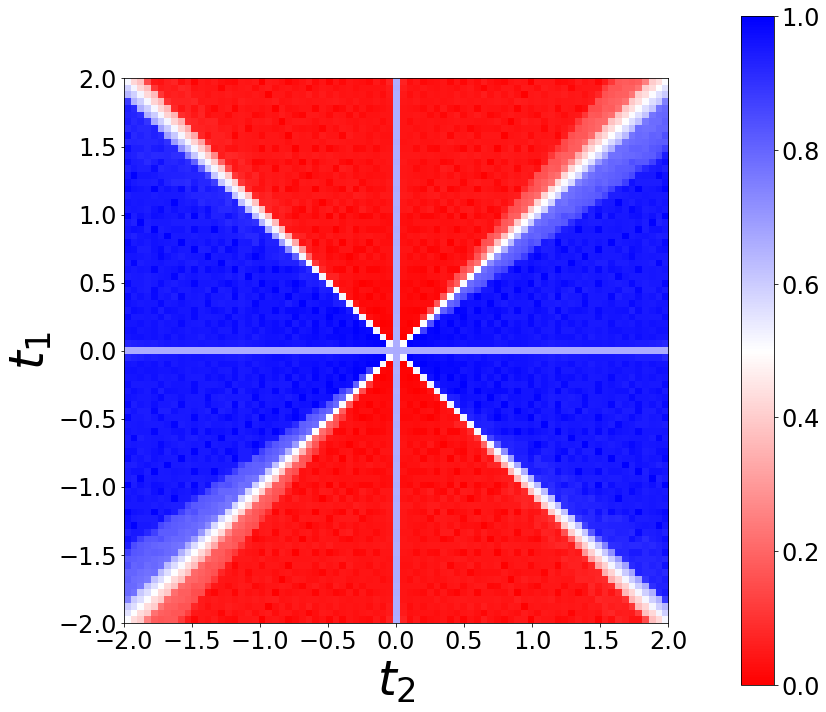

In [55]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_50_random_feat_2_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)